IMPORT

In [7]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import pickle as cPickle
import featureExtraction

LOAD AND PREPROCESSING DATA

In [8]:
# Take feature vector
path = '/SQLI/Training/'
ds = pd.read_csv(path + "data.csv", encoding='utf-8')

# Present data as dataFrame
df = pd.DataFrame(ds,columns=['Length', 'Keywords', 'KeywordsFreq', 'InSpcChars', 'InComment', 'InWildcards', 'InEscape', 'SpcCharsFreq', 'unionStr', 'errorBaseStr', 'boolStr', 'timeBaseStr', 'InParam', 'InEncoding', 'errorMess', 'storedProc', 'unusualChars', 'hasSubquery', 'hasMulquery', 'conditionStm', 'hasUnusualContent', 'binaryDataFeature', 'dbSpecific', 'httpHeader', 'Cookies', 'httpRequest', 'webRelated', 'Label'])

X = df[['Length', 'Keywords', 'KeywordsFreq', 'InSpcChars', 'InComment', 'InWildcards', 'InEscape', 'SpcCharsFreq', 'unionStr', 'errorBaseStr', 'boolStr', 'timeBaseStr', 'InParam', 'InEncoding', 'errorMess', 'storedProc', 'unusualChars', 'hasSubquery', 'hasMulquery', 'conditionStm', 'hasUnusualContent', 'binaryDataFeature', 'dbSpecific', 'httpHeader', 'Cookies', 'httpRequest', 'webRelated']]
X.fillna(0, inplace=True)
y = df['Label']

# Preprocessing 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)


C:\Users\Kagami\AppData\Local\Temp\ipykernel_16996\146428082.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


NAIVE BAYES

Predicted     0     1
Actual               
0          8247  3051
1           661  2949
Accuracy:  0.7510061711832573
F1 Score:  0.613735691987513
Precision Score:  0.8168975069252078
Recall Score:  0.4915


NameError: name 'f1_score' is not defined

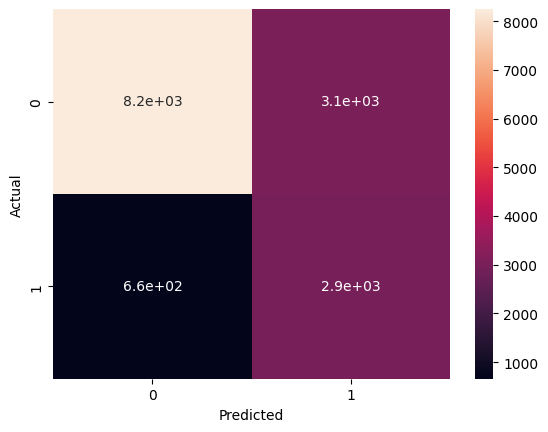

In [10]:
from sklearn.naive_bayes import GaussianNB


nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)
print(confusion_matrix)



print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('F1 Score: ',metrics.f1_score(y_pred, y_test))
print('Precision Score: ', metrics.precision_score(y_pred, y_test))
print('Recall Score: ', metrics.recall_score(y_pred, y_test))


LOGISTIC REGRESSION

C:\Users\Kagami\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predicted      0     1
Actual                
0          10243  1023
1           1862  1780
Accuracy:  0.8064797424201771
F1 Score:  0.552366175329713
Precision Score:  0.4887424492037342
Recall Score:  0.6350338922582947


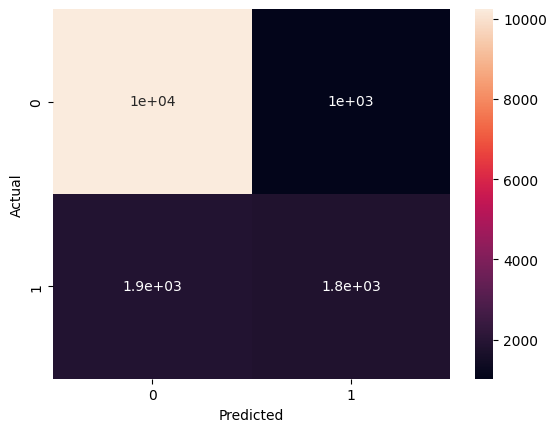

In [ ]:
from sklearn.linear_model import LogisticRegression


lr_clf = LogisticRegression()
y_pred_lr = lr_clf.fit(X_train, y_train)
y_pred = y_pred_lr.predict(X_test)

confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)
print(confusion_matrix)



print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('F1 Score: ',metrics.f1_score(y_pred, y_test))
print('Precision Score: ', metrics.precision_score(y_pred, y_test))
print('Recall Score: ', metrics.recall_score(y_pred, y_test))




DECISION TREE

Predicted      0     1
Actual                
0          10956   310
1            435  3207
Accuracy:  0.9500268312315535
F1 Score:  0.8959351864785584
Precision Score:  0.8805601317957167
Recall Score:  0.911856696047768


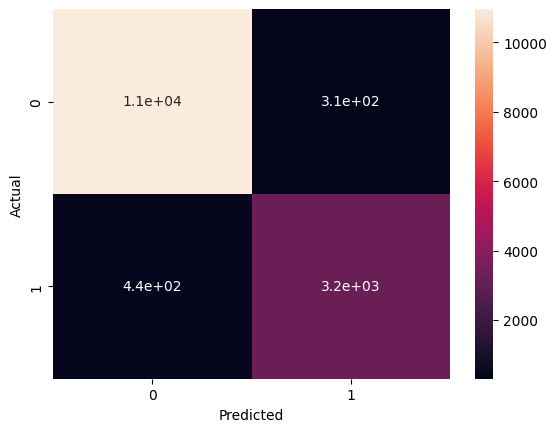

In [ ]:
from sklearn import tree

DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)
print(confusion_matrix)



print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('F1 Score: ',metrics.f1_score(y_pred, y_test))
print('Precision Score: ', metrics.precision_score(y_pred, y_test))
print('Recall Score: ', metrics.recall_score(y_pred, y_test))




SUPPORT VECTOR MACHINE

Predicted      0     1
Actual                
0          10784   482
1            513  3129
Accuracy:  0.9332573115105983
F1 Score:  0.8628153867365228
Precision Score:  0.8591433278418451
Recall Score:  0.8665189698144559


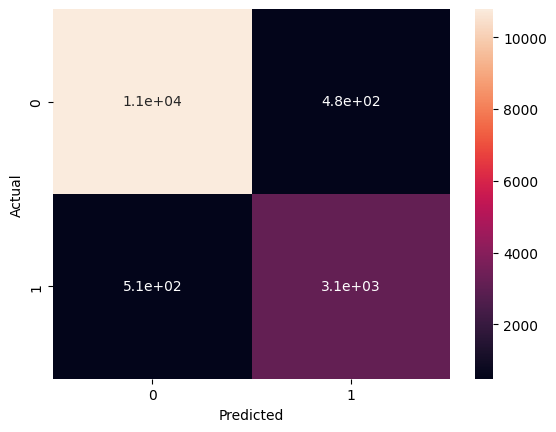

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)
print(confusion_matrix)



print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))
print('F1 Score: ',metrics.f1_score(y_pred, y_test))
print('Precision Score: ', metrics.precision_score(y_pred, y_test))
print('Recall Score: ', metrics.recall_score(y_pred, y_test))




RANDOM FOREST